# Snowfall Removal Budget Calculation

## Overview

This notebook illustrates the usage of History on Demand Direct API to calculate the costs incurred to clear snowfall. Specifically, we will analyse the snowfall data to understand the snow accumulation by comparing it with the average snowfall pertaining to the same period over the past years. With this analysis, we can calculate the maintenance costs of clearing snow for a local government organisation.


## Setup

All of the documentation and samples we provide are built using Jupyter notebooks.

To run the notebooks, below are the basic requirements:

1. A Python3.7 or higher environment
2. A Jupyter Notebook environment
Note: The notebooks include runnable examples but you need to run them in order from top to bottom. This is because there are some lines of set up code, for example, setting authentication credentials, that only appear in the first code cell. We leave them out in the subsequent cells to avoid clutter.

To run this notebook seamlessly, you have to first configure your EI API credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your EI API key>
api.org_id = <Your EI Org Id>
api.tenant_id = <Your EI Tenant Id>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../auth/secrets.ini')```

Execute this notebook, cell after cell.

### Analyse the Snow Data by retrieving the data required by following the below steps.

Import all the module(s) needed for us to be able to run this notebook.

In [ ]:
%pip install configparser

In [75]:
#Import required libraries
import pandas as pd

import requests
from pprint import pprint
import pandas as pd
import configparser
import json
from pandas import json_normalize

Now, we will set up the API Credentials as listed in below code and get an authentication token needed for us to be able to run and retrieve the data.

In [76]:
config = configparser.RawConfigParser()
config.read('../auth/secrets.ini')

EI_API_KEY     = config.get('EI', 'api.api_key')
EI_ORG_ID     = config.get('EI', 'api.org_id') 
EI_TENANT_ID     = config.get('EI', 'api.tenant_id')

EI_AUTH_ENDPOINT = "https://api.ibm.com/saascore/run/authentication-retrieve"
EI_API_BASE_URL  = "https://api.ibm.com/geospatial/run/v3/wx"
EI_API_ENDPOINT  = f"{EI_API_BASE_URL}/hod/r1/direct"


# EI_HISTORICAL_API_ENDPOINT = f"{EI_API_BASE_URL}/observations/historical/analytical/r2"

EI_AUTH_CLIENT_ID  = 'saascore-' + EI_TENANT_ID
EI_CLIENT_ID = 'geospatial-' + EI_TENANT_ID

auth_request_headers: dict = {}
auth_request_headers["X-IBM-Client-Id"] = EI_AUTH_CLIENT_ID
auth_request_headers["X-API-Key"] = EI_API_KEY

verify = True

auth_url = f"{EI_AUTH_ENDPOINT}/api-key?orgId={EI_ORG_ID}"
              
response = requests.get(url = auth_url,
                        headers = auth_request_headers,
                        verify  = verify
                       )
if response.status_code == 200:
    jwt_token = response.text
    print("Authentication Success")
else:     
    print("Authentication Failed")
    print(response.text)

Authentication Success


Once the API credentials are setup, we will build the required query parameters and headers for making an HOD Direct API call. 
With the query parameters and the headers setup, we will send an HTTP GET Request to the HOD Direct API Endpoint and get back the response.
This API response is a JSON structure which we'll convert to Dataframe and display.

There are various parameters you can send to retrieve the snowfall information for a particular location - 
1. either by using the geo coordinates or a postalKey of the desired location.
2. startDateTime and endDateTime for the location.
3. the required format for the output to be retrieved, in this case JSON and many other parameters required.


In [77]:
# Create the query parameter
# provide the geocode cordinates, startdatetime, enddatatime, format as json, units as per your requirements to get data
query_params: dict = {}
query_params["startDateTime"] = "2023-03-07T00"
query_params["endDateTime"] = "2023-04-07T23"
query_params["format"] = "json"
query_params["units"] = "e"
query_params["compact"] = "false"
query_params["postalKey"] = "80301:US"

# Create the query headers
query_request_headers: dict = {}
query_request_headers["x-ibm-client-id"] = EI_CLIENT_ID
query_request_headers["Authorization"] = "Bearer " + jwt_token

# Create the Request object as GET Request with host URL, query parameters and query headers
request = requests.Request('GET', EI_API_ENDPOINT, params=query_params, headers=query_request_headers)
 
# Create a Session object and send the request
session = requests.Session()
response = session.send(request.prepare())

if response.text != "":
    # Get the response as json
    response_json = response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = json_normalize(dict) 
    
    # display
    #pprint(response_json)
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display(dataframe) 
else:
    print("Empty Response")

,requestedLatitude,requestedLongitude,latitude,longitude,gridpointId,validTimeUtc,drivingDifficultyIndex,iconCode,iconCodeExtended,precip1Hour,...,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windGust,windSpeed
0,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T00:20:00+0000,0,32,3200,0.0,...,-5.8,56.6,36.4,8.7,39.5,0,10.00,290.0,32.0,16.1
1,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T01:20:00+0000,0,32,3200,0.0,...,-0.1,49.9,36.4,6.5,42.0,0,10.00,300.0,22.1,10.5
2,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T02:20:00+0000,0,31,3100,0.0,...,-1.2,49.9,36.4,7.3,41.6,0,10.00,320.0,NaN,6.0
3,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T03:20:00+0000,0,33,3300,0.0,...,-2.3,49.9,36.4,9.8,39.5,0,10.00,30.0,NaN,5.6
4,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T04:20:00+0000,0,29,2900,0.0,...,-1.4,49.9,36.4,11.9,39.8,0,10.00,220.0,NaN,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T18:20:00+0000,0,32,3200,0.0,...,6.5,58.4,27.8,13.9,58.4,6,10.00,100.0,NaN,2.2
163,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T19:20:00+0000,0,32,3200,0.0,...,6.9,61.3,27.8,14.5,61.3,6,10.00,90.0,NaN,3.6
164,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T20:20:00+0000,0,32,3200,0.0,...,7.7,64.0,27.8,12.1,64.0,6,10.00,110.0,NaN,2.9
165,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T21:20:00+0000,0,32,3200,0.0,...,8.1,65.9,27.8,12.1,65.8,4,10.00,200.0,NaN,6.3


As we can see above, the information retrieved has a lot of data pertaining to the specified location. The dataframe above consists of a total of 40 columns and 167 rows with all the information needed for the analysis.

Now that we have retrieved the data, we can plot it on a graph to visualize how the temparature and temperatureDewPoint relates with each other across different time periods using the code below.

<Axes: xlabel='validTimeUtc'>

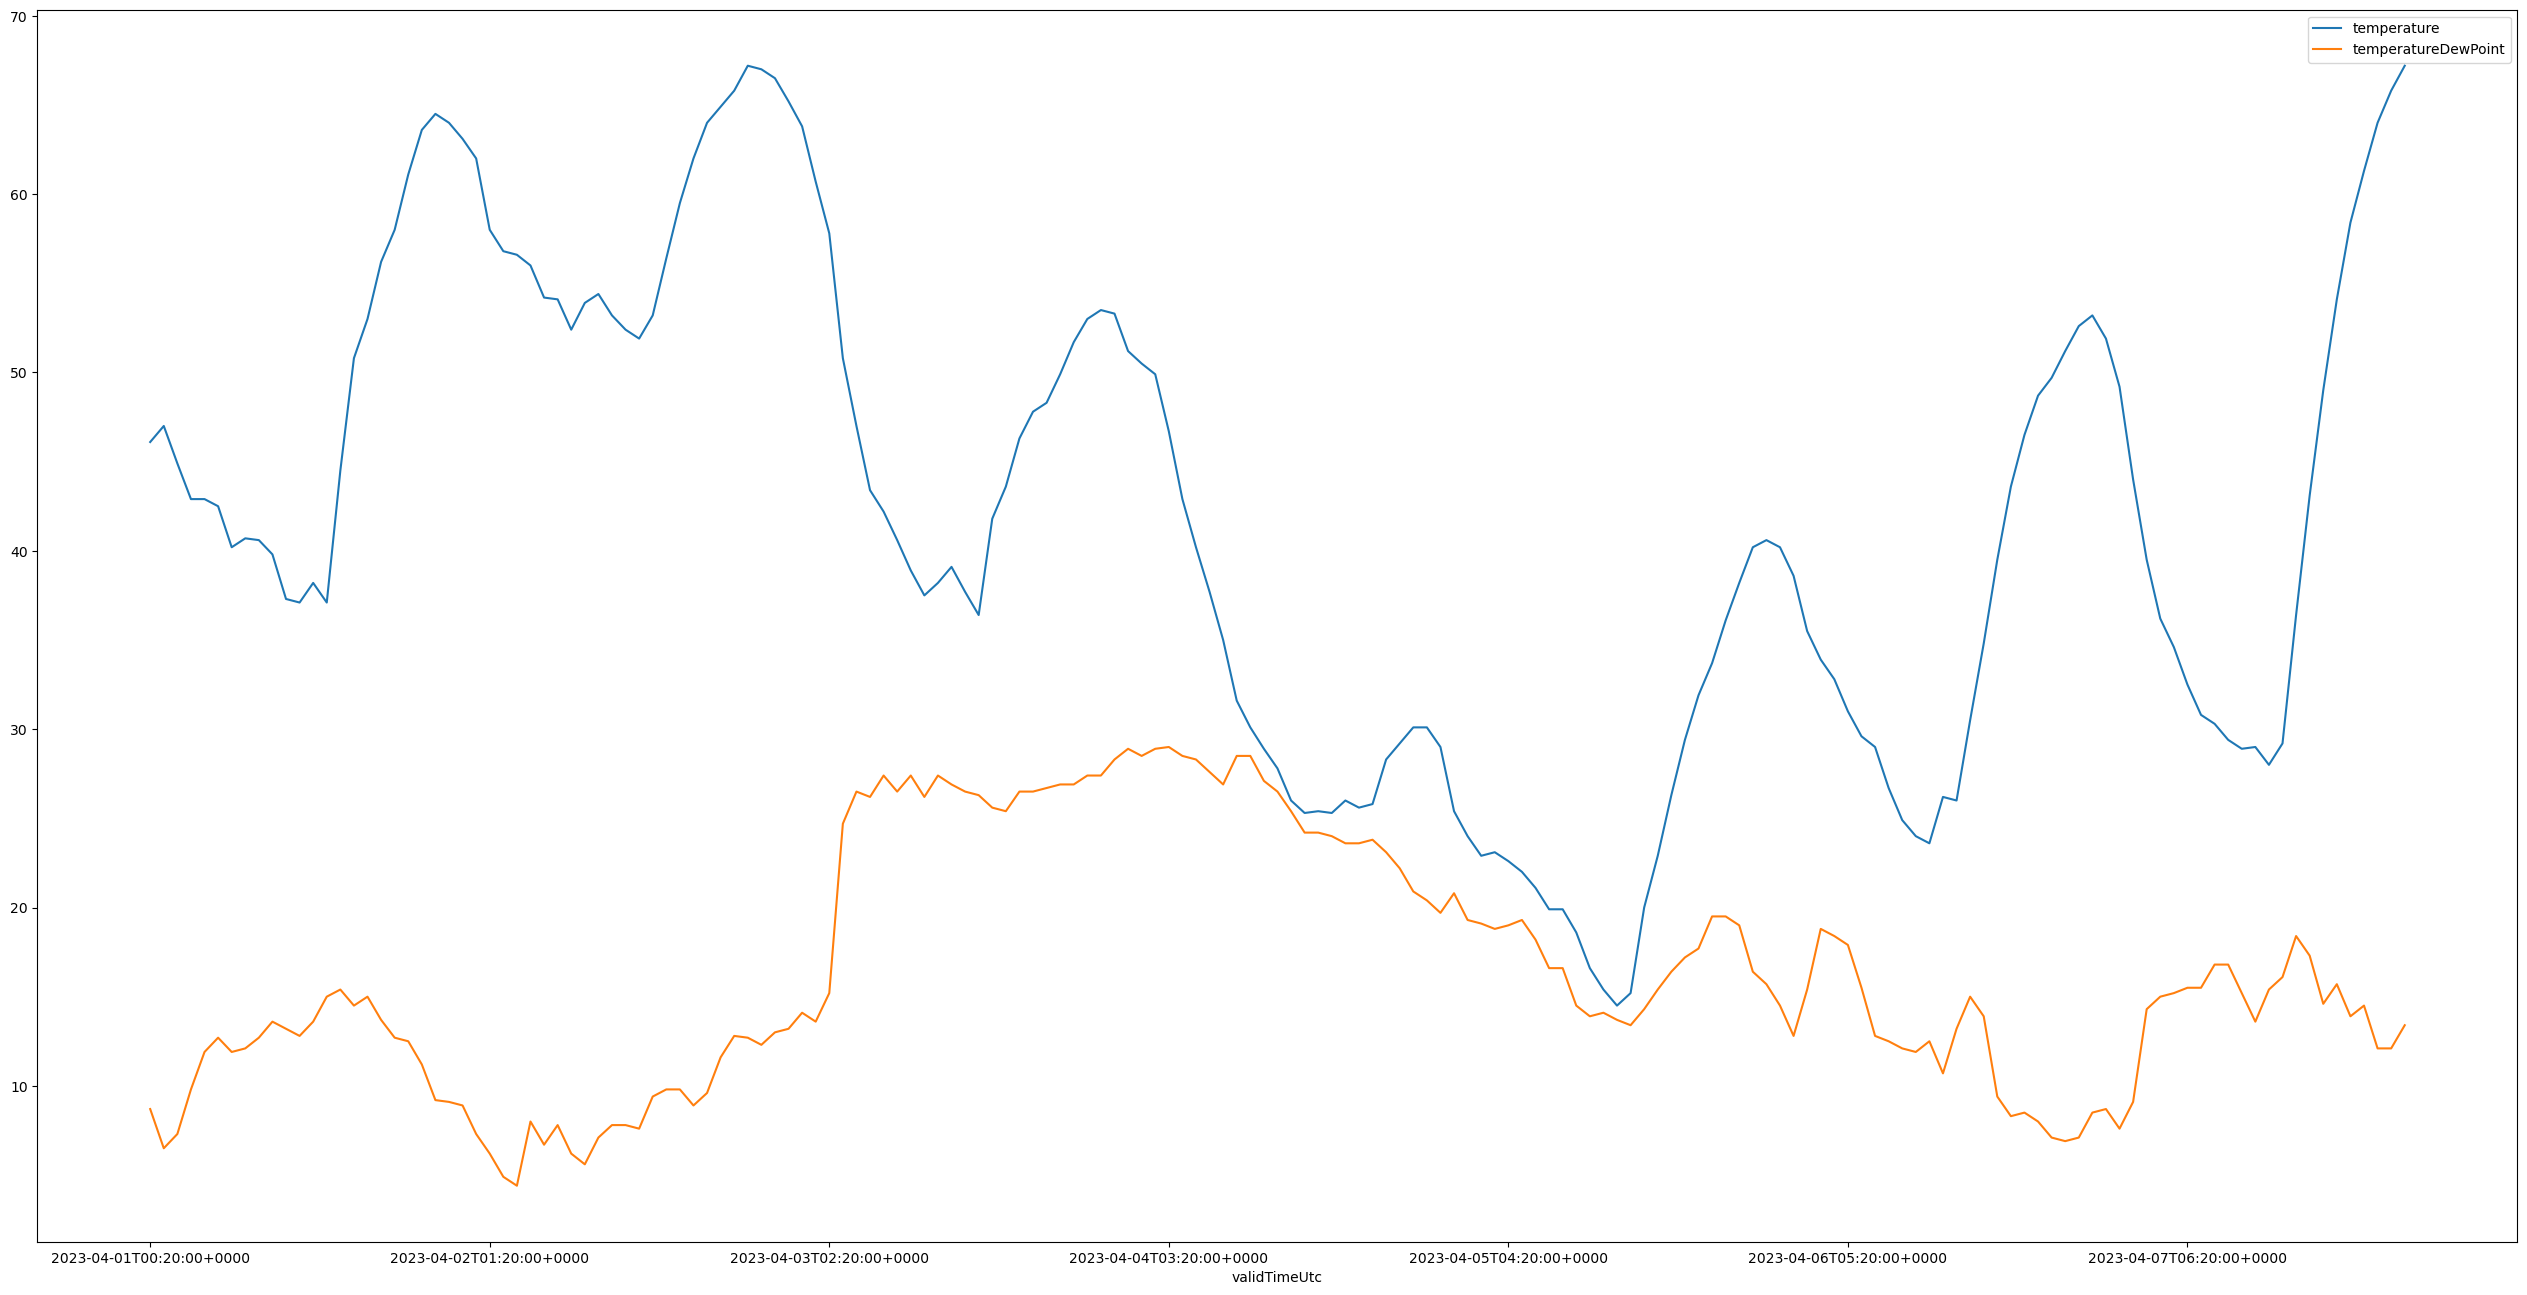

In [78]:
dataframe.plot(x='validTimeUtc',y=['temperature','temperatureDewPoint'],figsize=(32,16))

We can now sum up the precip1Hour and snow1Hour columns' data to get the whole value for precipitation and snow respectively.

In [101]:
#sum up precip and snow for March
marPrecip2023 = dataframe['precip1Hour'].sum()
MarSnow2023 = dataframe['snow1Hour'].sum()
print (marPrecip2023,MarSnow2023)

0.21000000000000002 2.9


We can now compare the variance between March 2023 and historic averages using the values in the dictionary below.

In [102]:
# Data in dictionary form
data = {
    'almanacInterval': [0],
    'almanacRecordDate': ['M'],
    'almanacRecordPeriod': [101],
    'almanacRecordYearMax': [2005],
    'almanacRecordYearMin': [1930],
    'precipitationAverage': [0.76],
    'snowAccumulationAverage': [16.03],
    'stationId': [50848],
    'stationName': ['BOULDER'],
    'temperatureAverageMax': [47],
    'temperatureAverageMin': [22],
    'temperatureMean': [35],
    'temperatureRecordMax': [73],
    'temperatureRecordMin': [-33]
}

# Convert dictionary to DataFrame
snowfall_normal_df = pd.DataFrame(data)

Let's display the snowAccumulationAverage from the above data.

In [98]:
Mar_normal_snow =  snowfall_normal_df['snowAccumulationAverage'].item()
print (Mar_normal_snow)

16.03


Perform the calculations below to get the costs incurred to remove the accumulated snow.

In [103]:
# We know that Boulder's average snowfall is 88.3" and that the annual snow removal budget is $2M

PercentAnnualSnowInMar = round((MarSnow2023 / 88.3),2)
Mar_percentnormal = round((MarSnow2023 / Mar_normal_snow),2)
print (PercentAnnualSnowInMar,Mar_percentnormal)

0.03 0.18


Get the normal cost of snow removal in March using the data we have.

In [104]:
# Normal Cost of snow removal in the month of March
normal_Mar_cost = 2000000 * (Mar_normal_snow / 88.3)
print (round(normal_Mar_cost,2))

363080.41


Now that we have the cost for snow removal in March normally, let's calculate the cost of March 2023 using the below code snippet.

In [105]:
#cost of snow removal in the month of March 2023
Mar2023_cost = normal_Mar_cost * Mar_percentnormal
print (round(Mar2023_cost,2))

65354.47


Let's calculate the difference in snow removal costs in March 2023 vs normal March in Boulder.

In [107]:
#2023 budget 
delta = normal_Mar_cost - Mar2023_cost
print (f"2023 low snow totals reduced the City of Boulder's spend by ${round(delta,2)}")

2023 low snow totals reduced the City of Boulder's spend by $297725.93


By using the calculations above, we are able to infer that the cost of snow removal in March is ordinarily $297,725.93 more expensive than the approximate cost of snow removal in March 2023 for the city of Boulder.